# Importing Necessary Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import datetime
import os

from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Flatten, Conv2D, Activation, BatchNormalization, Dense, Input, Dropout, GRU, LSTM, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading and Preprocessing Data

In [2]:
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
)

In [4]:
train = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [5]:
type(train)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [6]:
test = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    seed=40,
    shuffle=True
)

Found 7178 images belonging to 7 classes.


# Base Model

## Model Building

In [7]:
model = Sequential()

model.add(Input(shape=(64, 64, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

I0000 00:00:1744543603.355313    4292 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,487 (658.15 KB)

 Trainable params: 168,487 (658.15 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(
    train,
    epochs=50,
    verbose=1,
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - categorical_accuracy: 0.2619 - loss: 1.7893
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.3892 - loss: 1.5638
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.4426 - loss: 1.4517
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.4658 - loss: 1.3817
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.4930 - loss: 1.3184
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.5148 - loss: 1.2692
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.5257 - loss: 1.2426
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.5425 - loss: 1.2152
Epoch 9/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.5468 - loss: 1.1941
Epoch 10/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - categorical_accuracy: 0.5564 - loss: 1.1670
Epoch 11

## Base Model Performance

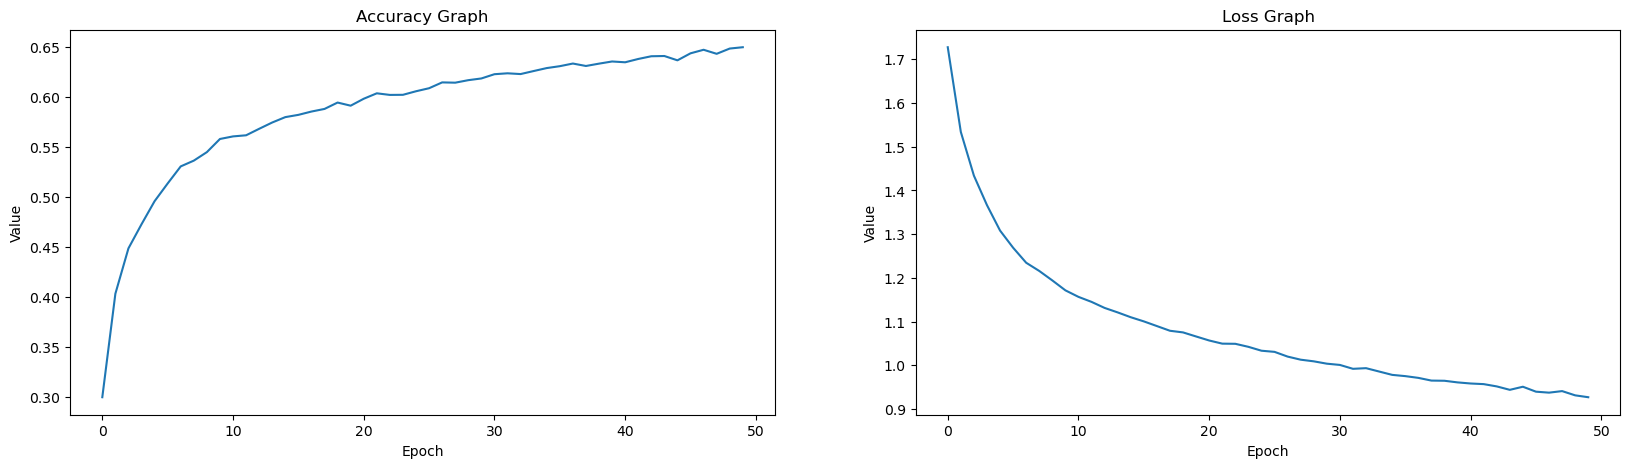

In [39]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['categorical_accuracy'], label='Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.show()

# Model 1